In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
dict_dtype = {'Item Number':str,
'Bottle Volume (ml)':int,
'Bottles Sold':int,
'State Bottle Retail':float}

In [5]:
products = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\item_info_to_cluster.csv',dtype=dict_dtype, index_col=0)

In [6]:
products.rename({'Item Number':'Item_Number', \
              'Item Description':'Item_Description','Bottle Volume (ml)':'Bottle_Volume','State Bottle Retail': 'Bottle_Retail' \
                ,'Bottles Sold':'Bottles_Sold' } ,axis=1, inplace=True)
              

In [7]:
products2 = products.copy()

In [8]:
products.describe()

,Bottle_Volume,Bottle_Retail,Bottles_Sold
count,4475.000000,4475.000000,4.475000e+03
mean,792.361564,31.221806,6.930340e+03
std,410.724957,69.350753,3.972229e+04
min,20.000000,0.990000,1.000000e+00
25%,750.000000,11.799501,5.250000e+01
50%,750.000000,20.250000,5.470000e+02
75%,750.000000,35.000000,3.622000e+03
max,5250.000000,2963.694000,2.105088e+06


In [9]:
products.shape

(4475, 5)

<AxesSubplot:xlabel='Bottle_Retail', ylabel='Count'>

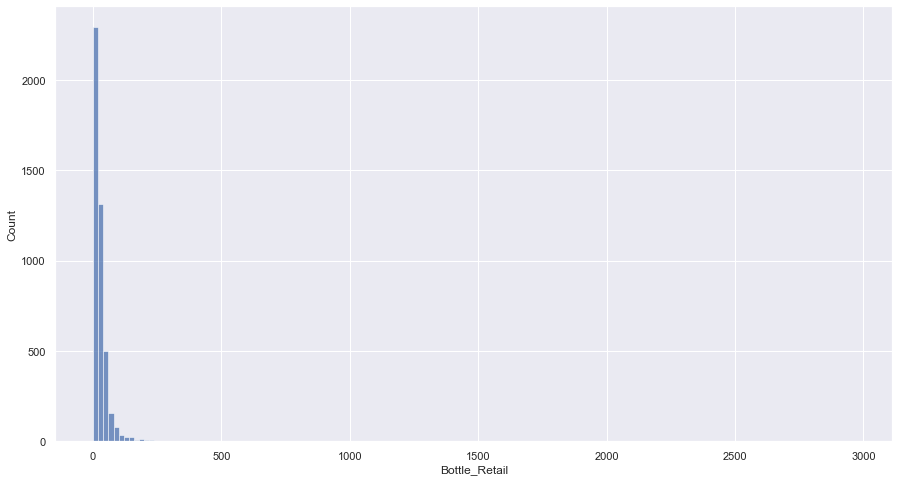

In [10]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(products['Bottle_Retail'], bins=150)


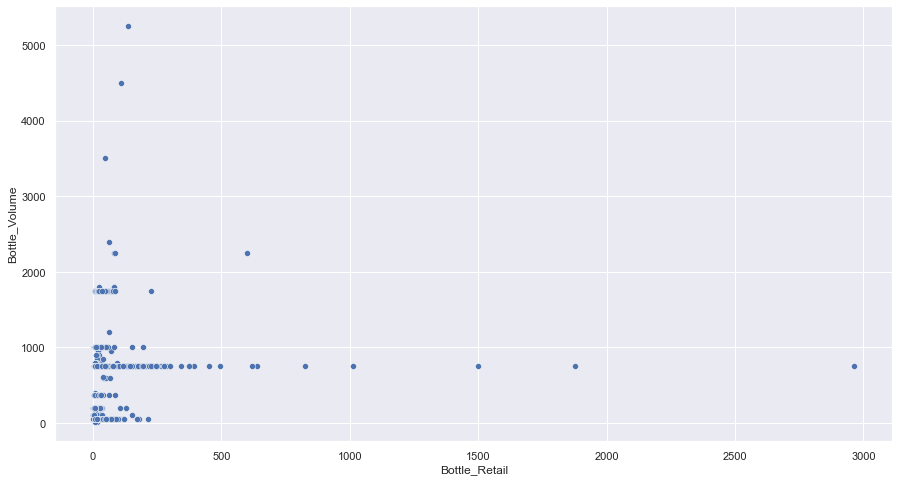

In [11]:
# products.plot.scatter(x='Bottle_Volume', y='Bottle_Retail')
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottle_Volume')
# gfg.set_ylim(0, 80)
# gph.set_xlim(0.98,3000)
# gph.set_xticks(range(0.98,3000))
plt.show()

In [12]:
products.Bottle_Retail.corr((products.Bottle_Volume))

0.012858551897243728

In [13]:
products.Bottle_Retail.corr((products.Bottles_Sold))

-0.04408941079679311

In [14]:
products.Bottles_Sold.corr((products.Bottle_Volume))

-0.000152168220141047

In [15]:
filt = products.Bottle_Retail > 1000
products[filt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
1636,48725,Remy Martin Louis XIII,750,2963.694,17
3194,906532,Glengoyne 30 YO,750,1012.500,1
3330,917673,HA Double Eagle Very Rare,750,1500.000,2
3367,919976,HA OFC Bourbon 1995,750,1875.000,10


In [16]:
filt2 = products.Bottle_Volume > 3000
products[filt2]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
0,100015,Fireball Cinnamon Whiskey Bag in Box,3500,45.0,1123
139,101515,Fireball Cinnamon Whiskey Keg,5250,138.0,180
155,101665,Stumpys Spirits Cocktail Collection Gift Set,4500,108.0,115


In [17]:
filt3= products2.Item_Number == '64870'
products[filt3]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
2035,64870,Fireball Cinnamon Whiskey,100,1.35,2105088


In [18]:
np.sum(products.Bottles_Sold)

31013272

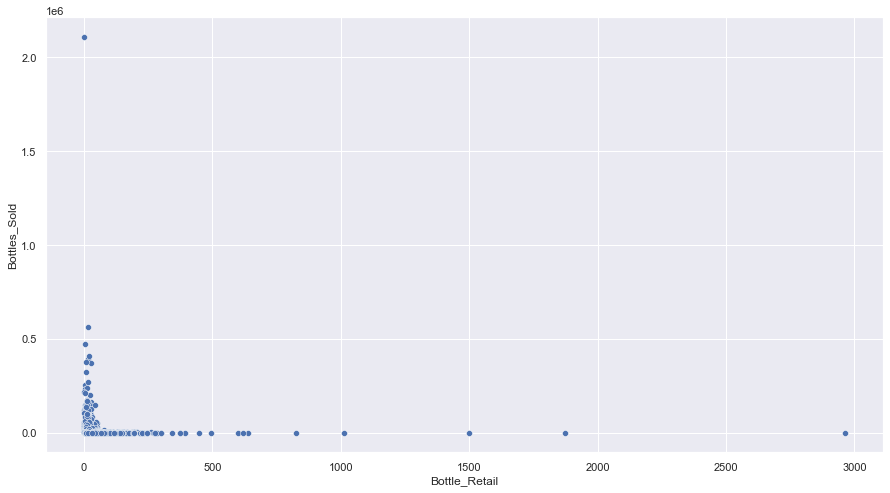

In [19]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottles_Sold')
# gfg.set_ylim(0, 80)

remove outliers

In [20]:
# stop

In [21]:
filt = products2.Bottle_Retail > 1000 #drop outliers of Bottle Retail

In [22]:
products2[filt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
1636,48725,Remy Martin Louis XIII,750,2963.694,17
3194,906532,Glengoyne 30 YO,750,1012.500,1
3330,917673,HA Double Eagle Very Rare,750,1500.000,2
3367,919976,HA OFC Bourbon 1995,750,1875.000,10


In [23]:

products2 = products2[~filt]

In [24]:
products2.shape

(4471, 5)

In [25]:
filt2 = products2.Bottle_Volume > 3000 #drop outliers of Bottle Volume

In [26]:
products2[filt2]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
0,100015,Fireball Cinnamon Whiskey Bag in Box,3500,45.0,1123
139,101515,Fireball Cinnamon Whiskey Keg,5250,138.0,180
155,101665,Stumpys Spirits Cocktail Collection Gift Set,4500,108.0,115


In [27]:
products2 = products2[~filt2] 

In [28]:
products2.shape

(4468, 5)

In [29]:
filt3= products2.Item_Number == '64870'

In [30]:
products2[filt3]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
2035,64870,Fireball Cinnamon Whiskey,100,1.35,2105088


In [31]:
# products2[filt3]


products2 = products2[~filt3]

scale data for clustering

In [32]:
products2.shape

(4467, 5)

In [33]:
# cols_to_scale = ['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']

In [34]:
scaler = StandardScaler()

In [35]:


products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (products2[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,4.467000e+03,4.467000e+03,4.467000e+03
mean,1.391221e-15,4.868783e-16,-6.299590e-16
std,1.000112e+00,1.000112e+00,1.000112e+00
min,-1.927238e+00,-7.568580e-01,-2.653533e-01
25%,-1.004020e-01,-4.712175e-01,-2.632002e-01
50%,-1.004020e-01,-2.467525e-01,-2.429199e-01
75%,-1.004020e-01,1.439046e-01,-1.166652e-01
max,4.028748e+00,2.106697e+01,2.283490e+01


In [36]:
# model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


determine optimal number of clusters

In [37]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = products2[cluster_cols]

inertia_scores = []
for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    
#     intertia = model.inertia_
#     inertia_scores.append(inertia)
    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.6268009418153719
number of clusters =  3   silhouette score =  0.6117715125043457
number of clusters =  4   silhouette score =  0.6387061302265141
number of clusters =  5   silhouette score =  0.5801404539999855
number of clusters =  6   silhouette score =  0.5947806384880747
number of clusters =  7   silhouette score =  0.6077738968284422
number of clusters =  8   silhouette score =  0.5176009808917107
number of clusters =  9   silhouette score =  0.5273765962875363
number of clusters =  10   silhouette score =  0.4778737887516147


In [38]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

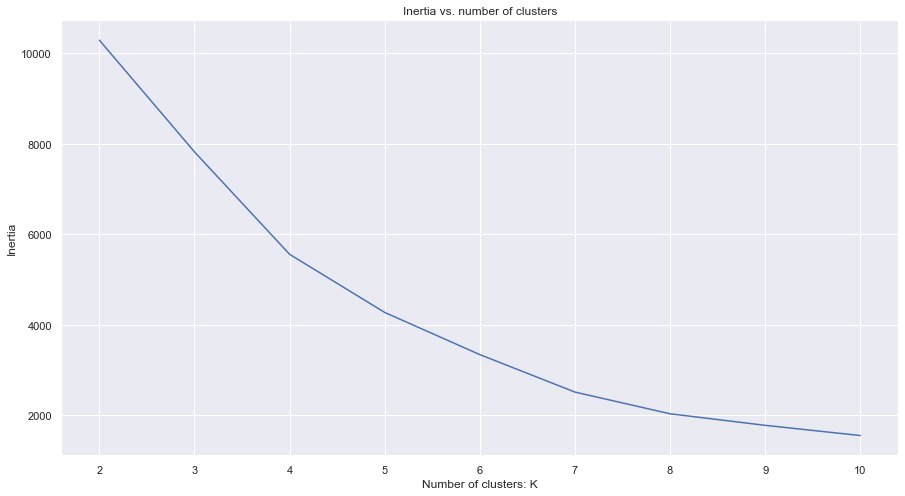

In [39]:

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get four clusters

In [40]:


cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=4, random_state=42)

model.fit(products2[cluster_cols])

products2['product_cluster'] = model.predict(products2[cluster_cols])

In [41]:
products2.head()

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster
1,10006,Scoresby Rare Scotch,750,7.70,4619,-0.100402,-0.579142,-0.075961,0
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,-0.100402,-0.367790,-0.155524,0
3,10008,Scoresby Rare Scotch,1750,15.75,12340,2.402113,-0.365936,0.240691,2
4,10009,Scoresby Rare Scotch,1000,10.11,1722,0.525227,-0.515313,-0.194772,0
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,-0.100402,0.313145,-0.240541,0


In [42]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4467 entries, 1 to 4474
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           4467 non-null   object 
 1   Item_Description      4467 non-null   object 
 2   Bottle_Volume         4467 non-null   int32  
 3   Bottle_Retail         4467 non-null   float64
 4   Bottles_Sold          4467 non-null   int32  
 5   Bottle_Volume_scaled  4467 non-null   float64
 6   Bottle_Retail_scaled  4467 non-null   float64
 7   Bottles_Sold_scaled   4467 non-null   float64
 8   product_cluster       4467 non-null   int32  
dtypes: float64(4), int32(3), object(2)
memory usage: 296.6+ KB


In [43]:
products2['Bottle_Volume_liters'] = products2.Bottle_Volume / 1000

In [44]:
# products2.Bottle_Volume_liters.std()

In [45]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume_liters' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Bottle_Volume_liters,Bottle_Retail,Bottles_Sold
product_cluster,,,
0,0.679858,25.967744,4276.876871
1,0.693814,210.918940,106.422680
2,1.754295,22.997218,8943.638767
3,0.760714,13.693436,196842.380952


In [46]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume_liters' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Bottle_Volume_liters                                   \
                                 min   max       std median      mean   
product_cluster                                                         
0                               0.02  1.20  0.240975   0.75  0.679858   
1                               0.05  2.25  0.299675   0.75  0.693814   
2                               1.75  2.40  0.045288   1.75  1.754295   
3                               0.05  1.75  0.461775   0.75  0.760714   

                Bottle_Retail                                                  \
                          min         max         std      median        mean   
product_cluster                                                                 
0                        0.99  117.000000   20.140220   20.250000   25.967744   
1                      119.52  824.990000  121.454563  172.500000  210.918940   
2                        7.34   87.247228   15.345373   17.250000   22.997218   
3                        1.34   41.522231    9.550859   11.413451   13.693436   

                Bottles_Sold                                                  
                         min     max            std    median           mean  
product_cluster                                                               
0                          1   97514   11014.765148     469.5    4276.876871  
1                          1    2319     306.790741      20.0     106.422680  
2                          3  108712   17253.510529    2039.5    8943.638767  
3                     101445  563260  110826.287590  145871.5  196842.380952

In [47]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume_liters' :['min','max', 'mean'], 'Bottle_Retail':['min','max', 'mean'],'Bottles_Sold':['min','max', 'mean'] })

Bottle_Volume_liters                 Bottle_Retail  \
                                 min   max      mean           min   
product_cluster                                                      
0                               0.02  1.20  0.679858          0.99   
1                               0.05  2.25  0.693814        119.52   
2                               1.75  2.40  1.754295          7.34   
3                               0.05  1.75  0.760714          1.34   

                                        Bottles_Sold                         
                        max        mean          min     max           mean  
product_cluster                                                              
0                117.000000   25.967744            1   97514    4276.876871  
1                824.990000  210.918940            1    2319     106.422680  
2                 87.247228   22.997218            3  108712    8943.638767  
3                 41.522231   13.693436       101445  563260  196842.380952

In [48]:
from freq_pd import proc_freq

In [49]:
proc_freq(products2,'product_cluster')

,product_cluster,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,0,3874,86.72,3874,86.72
1,1,97,2.17,3971,88.90
2,2,454,10.16,4425,99.06
3,3,42,0.94,4467,100.00


In [50]:
products2.loc[products2.product_cluster==3,:][['Item_Description','Bottle_Retail']].to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\high_end_list.csv')

In [51]:
products2.loc[products2.product_cluster==2,:]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster,Bottle_Volume_liters
3,10008,Scoresby Rare Scotch,1750,15.75,12340,2.402113,-0.365936,0.240691,2,1.75
16,100440,Skyy Vodka 1.75L with Infusion Watermelon 50ml...,1750,22.50,89,2.402113,-0.187161,-0.261744,2,1.75
18,100545,Grey Goose w/2 Martini Glasses,1750,53.13,17,2.402113,0.624082,-0.264697,2,1.75
22,100605,Jameson w/Ginger Ale,1750,43.47,108,2.402113,0.368235,-0.260965,2,1.75
41,100844,Pendleton Canadian Whiskey w/Belt Buckle,1750,37.50,84,2.402113,0.210118,-0.261949,2,1.75
...,...,...,...,...,...,...,...,...,...,...
4319,989292,Kirkland Signature Blended Scotch 3YR,1750,19.76,8712,2.402113,-0.259730,0.091900,2,1.75
4397,994950,Kirkland Signature Irish Whiskey,1750,31.83,3960,2.402113,0.059946,-0.102988,2,1.75
4399,994966,Smirnoff 80prf 1.75L w/Mini Mule Mug Ornament,1750,22.13,55,2.402113,-0.196960,-0.263139,2,1.75
4432,996028,Makers Mark Traypack,1750,45.00,480,2.402113,0.408757,-0.245709,2,1.75


In [52]:
products2.loc[products2.product_cluster==3,:]['Bottle_Retail'].min()

1.34

In [53]:
products2.loc[products2.product_cluster==3,:]['Bottle_Retail'].max()

41.5222314936226

In [54]:
products2.loc[products2.product_cluster==1,:]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster,Bottle_Volume_liters
37,100793,WhistlePig 18YR Double Malt,750,300.000000,51,-0.100402,7.162490,-0.263303,1,0.75
43,100854,Ardbeg 19YR Gift Box 2021 Edition,750,224.990000,24,-0.100402,5.175833,-0.264410,1,0.75
50,100941,Hennessy XO 2020 EOY Ice Experience VAP,750,149.990000,120,-0.100402,3.189441,-0.260473,1,0.75
274,15178,WhistlePig 10YR Mini,50,215.730000,47,-1.852163,4.930580,-0.263467,1,0.05
288,15320,WhistlePig 15YR,750,204.468557,226,-0.100402,4.632318,-0.256126,1,0.75
...,...,...,...,...,...,...,...,...,...,...
4301,988917,Codigo 1530 Tequila Origen (Extra Anejo),750,225.000000,18,-0.100402,5.176098,-0.264656,1,0.75
4310,989210,Jose Cuervo Reserva de La Familia,750,142.500000,48,-0.100402,2.991067,-0.263426,1,0.75
4323,989330,Herradura Selection Suprema,750,246.317143,21,-0.100402,5.740688,-0.264533,1,0.75
4347,990517,Sugarlands Appalachian Butter Pecan Sippin Cre...,50,119.520000,7,-1.852163,2.382436,-0.265107,1,0.05


In [55]:
# products_out=products2[['Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold','product_cluster']]

In [56]:
# products_out.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv')